In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Load dataset
df = pd.read_csv("student_pass_data.csv")

In [5]:
# Separate features and target
X = df[['Study Hours']]
y = df['Pass']

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 1.0


C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


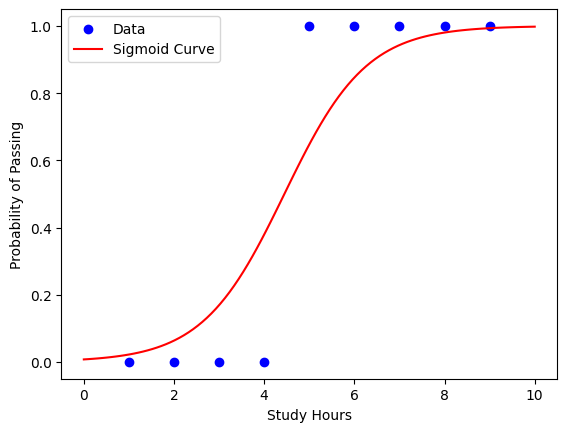

In [7]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot data and decision boundary
plt.scatter(df['Study Hours'], df['Pass'], color='blue', label='Data')
x_vals = np.linspace(0, 10, 100)
y_vals = model.predict_proba(x_vals.reshape(-1, 1))[:, 1]
plt.plot(x_vals, y_vals, color='red', label='Sigmoid Curve')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.legend()
plt.show()

In [8]:

pred_df=pd.DataFrame({
'x_test':X_test['Study Hours'],
'y_test':y_test,
'y_pred':y_pred
})
pred_df

,x_test,y_test,y_pred
7,8,1,1
1,2,0,0


Accuracy: 1.0
Log-Odds Equation: log(odds) = 1.10 * Study Hours + -4.89


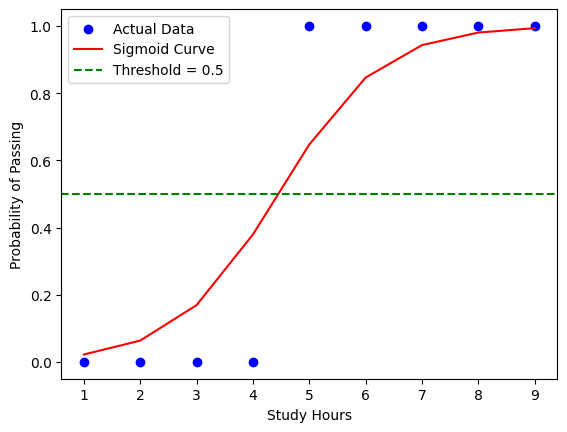

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # Sigmoid function

# Load dataset
df = pd.read_csv("student_pass_data.csv")

# Separate features and target
X = df[['Study Hours']]
y = df['Pass']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Extract model coefficients (w) and intercept (b)
w = model.coef_[0][0]  # Weight
b = model.intercept_[0]  # Bias
print(f"Log-Odds Equation: log(odds) = {w:.2f} * Study Hours + {b:.2f}")

# Plot data points
plt.scatter(df['Study Hours'], df['Pass'], color='blue', label='Actual Data')

# Compute probabilities for a range of values
x_vals = X
z_vals = w * x_vals + b  # Log-odds
probabilities = sigmoid(z_vals)  # Convert to probability

# Plot sigmoid curve
plt.plot(x_vals, probabilities, color='red', label='Sigmoid Curve')
plt.axhline(0.5, color='green', linestyle='--', label='Threshold = 0.5')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.legend()
plt.show()

In [8]:
# Example calculation
new_hours = 5
log_odds = w * new_hours + b
prob = sigmoid(log_odds)
print(f"For {new_hours} study hours, log-odds = {log_odds:.2f}, Probability of passing = {prob:.2f}")

For 5 study hours, log-odds = 0.61, Probability of passing = 0.65


In [9]:
np.linspace(0, 2,2)

array([0., 2.])

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1 0]
 [0 1]]


C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


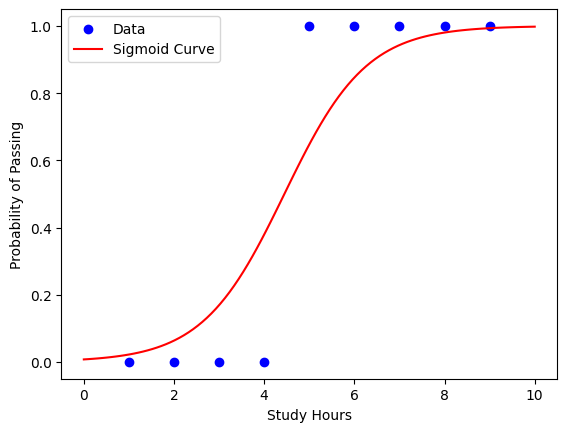

In [12]:
plt.scatter(df['Study Hours'], df['Pass'], color='blue', label='Data')
x_vals = np.linspace(0, 10, 100)  # Range of study hours
y_vals = model.predict_proba(x_vals.reshape(-1, 1))[:, 1]  # Probability of passing
plt.plot(x_vals, y_vals, color='red', label='Sigmoid Curve')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.legend()
plt.show()
